# Plots of oscilloscope records

In [8]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob

## Read waveforms from the file

   ./data/osc1_06_1747769134-CHAN1.h5
XINC: 2e-07    YINC: 0.0004    FRAMES: 7    TRIG: -0.0076    YORIGIN: 48.0
1 , -0.0092 , 0.0012000000000000001 , -6.176400000000001
2 , -0.014 , 0.0012000000000000001 , -6.6632
3 , -0.0356 , 0.0024000000000000002 , -17.4064
4 , -0.0332 , 0.0008 , -16.8696
5 , -0.008400000000000001 , 0.0016 , -3.8004
6 , -0.013600000000000001 , 0.0016 , -7.150800000000001
7 , -0.0088 , 0.0008 , -3.2480000000000007


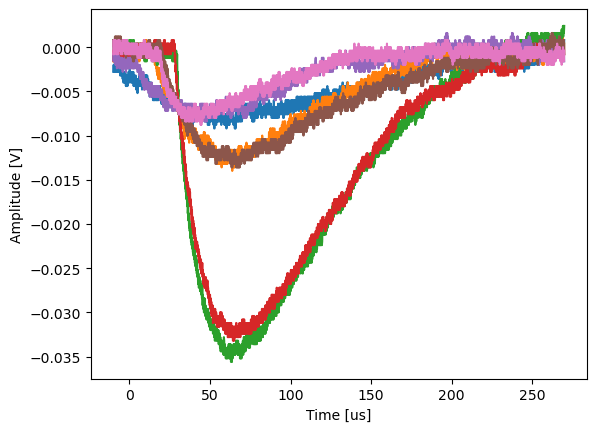

In [23]:
import matplotlib.pyplot as plt
import glob
import os
import time
import h5py
import numpy as np

# Nájde prvý súbor zodpovedajúci vzoru
file_found = None
for f in glob.iglob("./data/osc1*.h5"):
    print('  ', f)
    file_found = f
    break

if file_found is None:
    raise FileNotFoundError("No matching .h5 file found in ./data/")

with h5py.File(file_found, 'r') as hf:
    print('XINC:', np.array(hf.get('XINC')),
          '   YINC:', np.array(hf.get('YINC')),
          '   FRAMES:', np.array(hf.get('FRAMES')),
          '   TRIG:', np.array(hf.get('TRIG')),
          '   YORIGIN:', np.array(hf.get('YORIGIN')))

    frames = int(np.array(hf.get('FRAMES')))

    for n in range(1, frames + 1):
        data = hf.get(str(n))
        np_data = np.array(data, dtype=float)
        np_data = np_data - 128.0 - float(np.array(hf.get('YORIGIN')))
        np_data *= float(np.array(hf.get('YINC')))  # Convert to volts

        np_time = np.arange(1400, dtype=float)
        np_time *= float(np.array(hf.get('XINC')))
        np_time *= 1e6  # Convert to microseconds
        np_time -= 10   # Trigger time offset

        maximum = np.max(np_data)
        minimum = np.min(np_data)
        suma = np.sum(np_data)

        if n < 30:
            print(n, ',', minimum, ',', maximum, ',', suma)

        # Uncomment for conditional plotting:
        # if (np_data[170] - minimum < 0.001):
        #     plt.plot(np_time, np_data - minimum)

        # plt.plot(np_time, np_data - np_data[0])
        plt.plot(np_time, np_data)

plt.xlabel('Time [us]')
plt.ylabel('Amplitude [V]')
plt.show()


## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

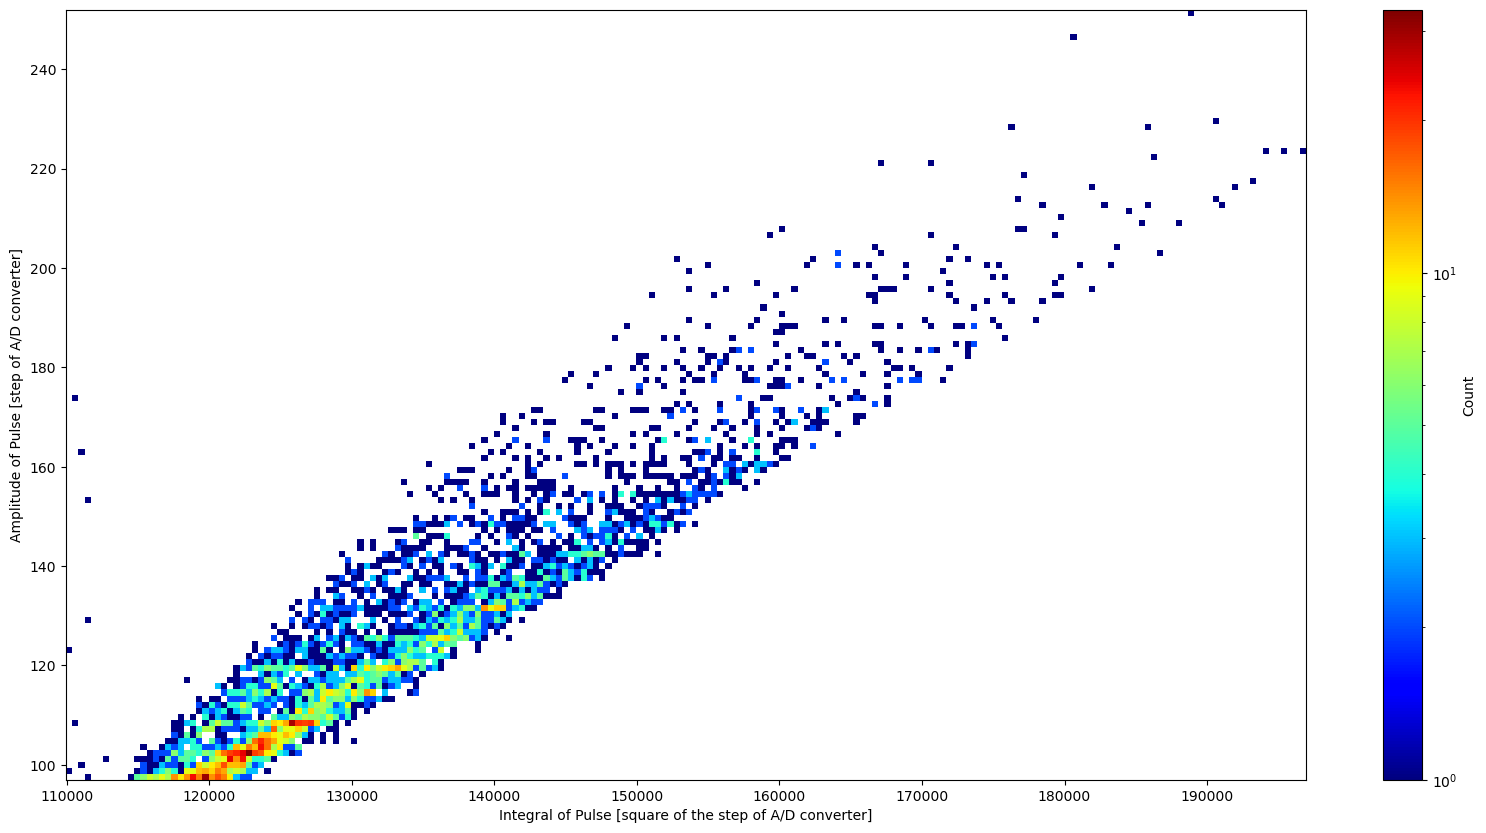

In [102]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib



plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData():
    global all_frames
    global xinc
    global yinc
    global x
    global y
    global z
    
    xinc = np.array(hf.get('XINC'))
    yinc = np.array(hf.get('YINC'))
    yorigin = np.array(hf.get('YORIGIN'))
    xorigin = np.array(hf.get('XORIGIN'))
    trig = np.array(hf.get('TRIG'))
    capturing = np.array(hf.get('CAPTURING'))

    frames = int(np.array(hf.get('FRAMES')))
    all_frames += frames
    #!!!print(f'XINC: {xinc}  YINC: {yinc}  FRAMES: {frames}  XORIGIN: {xorigin}  YORIGIN: {yorigin}  TRIG: {trig}')
    #!!!print(f'CAPTURING: {capturing}')

    for n in range(1, frames + 1):
        data = hf.get(str(n))
        np_data = np.array(data)
        
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma += np_data[i]

        if maximum < 256:
            x.append(maximum)
            y.append(suma)
            z.append(minimum)
            



for f in glob.iglob("./data/osc1*.h5"):
    #!!!print(f'  {f}')
    try:
        with h5py.File(f, 'r') as hf:
            ProcessData()
    except Exception as e:
        print(f"Error reading {f}: {e}")

if len(x) > 0 and len(y) > 0:
    h, xedges, yedges, image = plt.hist2d(
        y, x, bins=(200, 128),
        norm=matplotlib.colors.LogNorm(),
        cmap=plt.cm.jet
    )
else:
    print("\u26a0\ufe0f \u017d\u00e1dn\u00e1 data nebyla na\u010dtena. Histogram nebude vykreslen.")

plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
plt.colorbar(image, label='Count')
plt.show()



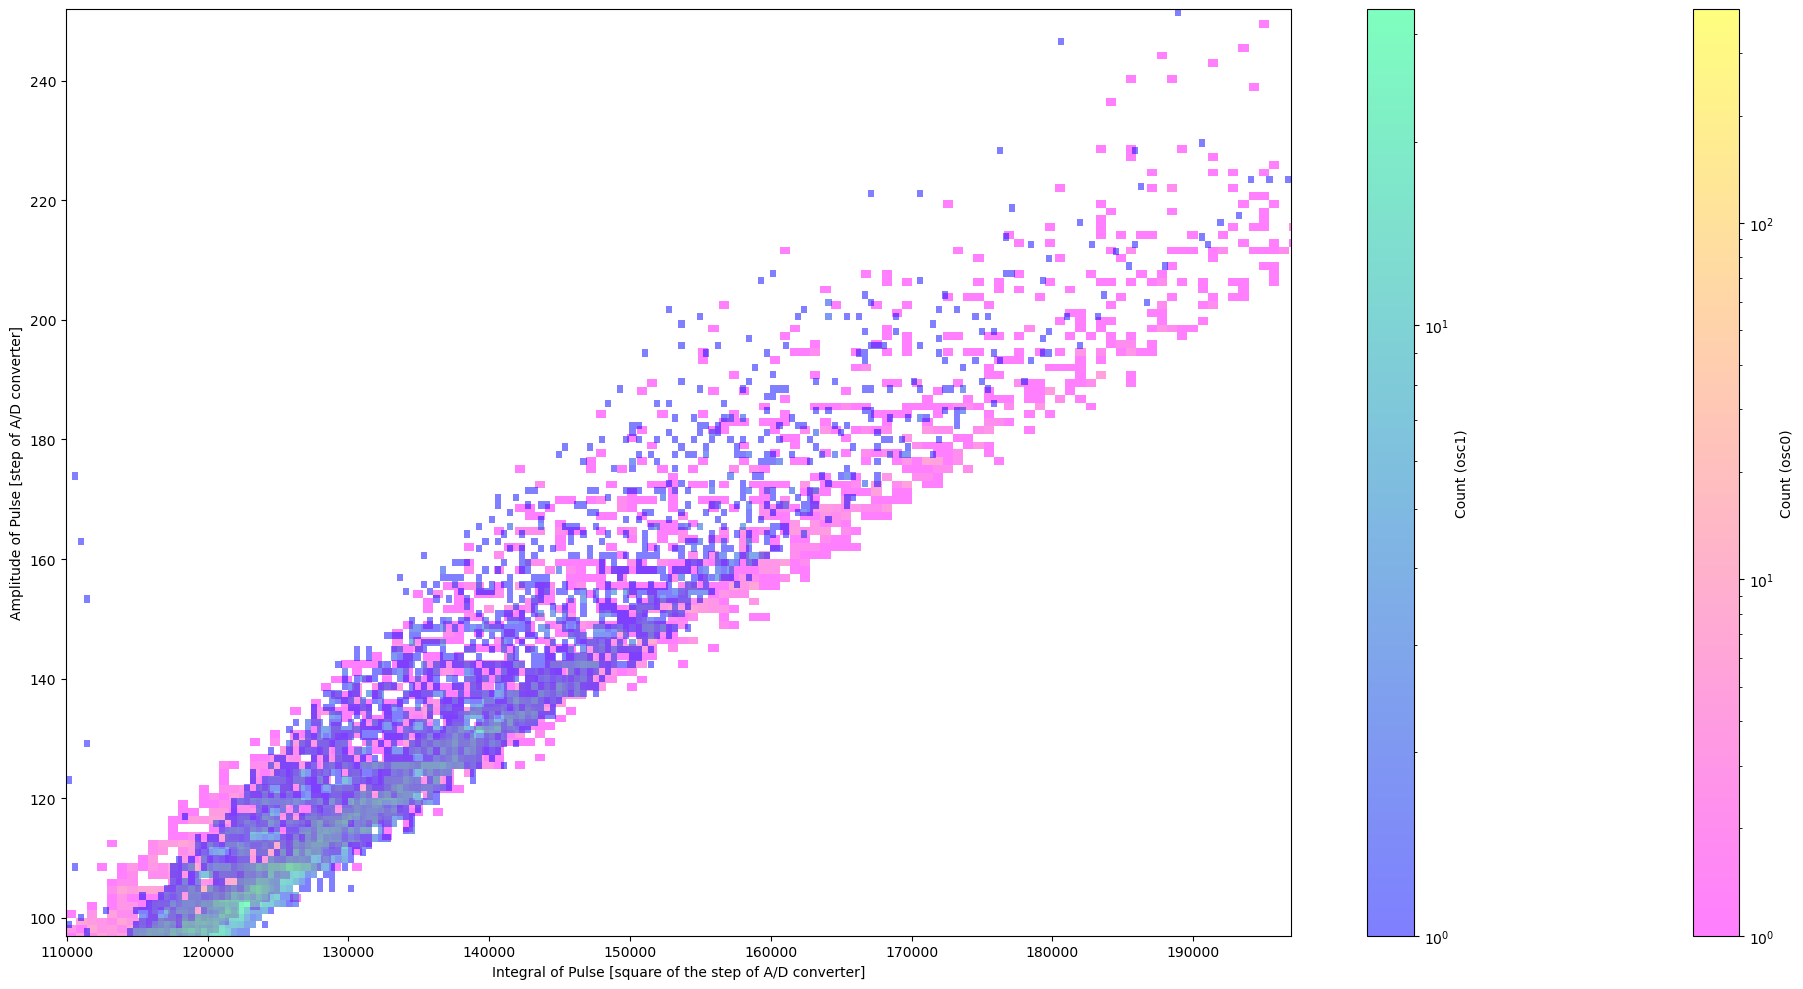

In [96]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import glob
import matplotlib.colors as mcolors

def ProcessData(hf, x, y, z):
    xinc = np.array(hf.get('XINC'))
    yinc = np.array(hf.get('YINC'))
    frames = int(np.array(hf.get('FRAMES')))
    
    for n in range(1, frames + 1):
        data = hf.get(str(n))
        if data is None:
            continue
        np_data = np.array(data)

        maximum = np.max(np_data[:1400])
        minimum = np.min(np_data[:1400])
        suma = np.sum(np_data[:1400])

        if maximum < 256:
            x.append(maximum)
            y.append(suma)
            z.append(minimum)

# Připravíme subplot a dvě sady dat
fig, ax = plt.subplots(figsize=(20, 10))

# 1. Sada dat (osc0)
x0, y0, z0 = [], [], []
for f in glob.iglob("./data/osc0*.h5"):
    try:
        with h5py.File(f, 'r') as hf:
            ProcessData(hf, x0, y0, z0)
    except Exception as e:
        print(f"Error reading {f}: {e}")

hist0 = None
if x0 and y0:
    hist0 = ax.hist2d(
        y0, x0, bins=(200, 128),
        norm=mcolors.LogNorm(),
        cmap=plt.cm.spring, alpha=0.5
    )

# 2. Sada dat (osc1)
x1, y1, z1 = [], [], []
for f in glob.iglob("./data/osc1*.h5"):
    try:
        with h5py.File(f, 'r') as hf:
            ProcessData(hf, x1, y1, z1)
    except Exception as e:
        print(f"Error reading {f}: {e}")

hist1 = None
if x1 and y1:
    hist1 = ax.hist2d(
        y1, x1, bins=(200, 128),
        norm=mcolors.LogNorm(),
        cmap=plt.cm.winter, alpha=0.5
    )

# Osy
ax.set_xlabel('Integral of Pulse [square of the step of A/D converter]')
ax.set_ylabel('Amplitude of Pulse [step of A/D converter]')

# Colorbary – oba, pokud existují
if hist0:
    plt.colorbar(hist0[3], ax=ax, label='Count (osc0)')
if hist1:
    plt.colorbar(hist1[3], ax=ax, label='Count (osc1)')

plt.tight_layout()
plt.show()


# Simply replot the current x, y in a nicer way

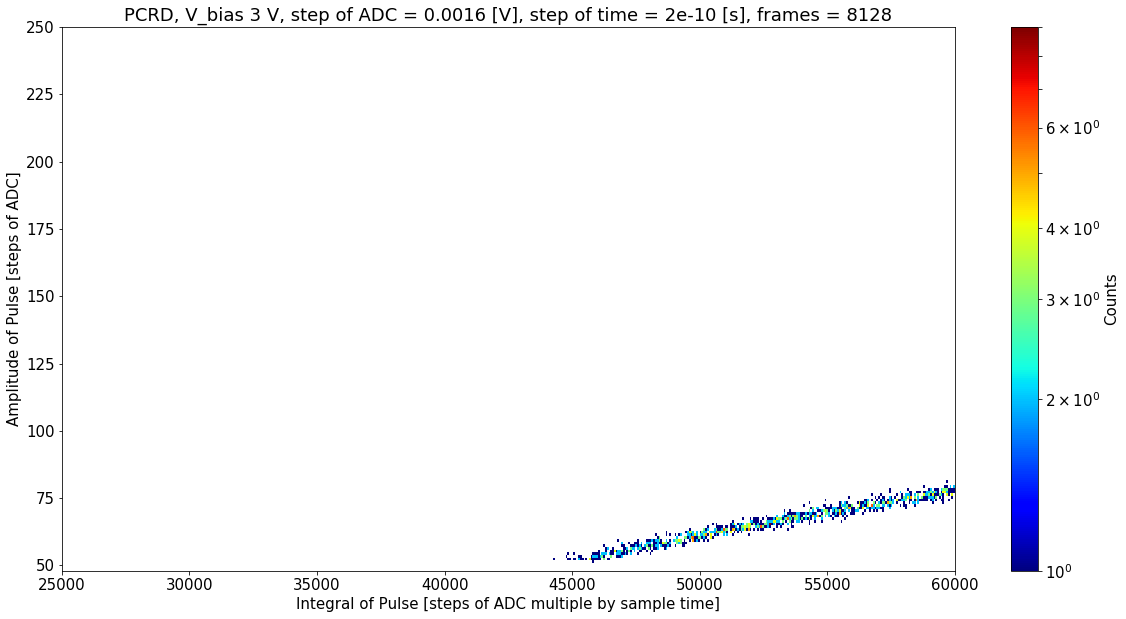

In [161]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(500,203), range= [[25000, 60000], [48,250]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [steps of ADC multiple by sample time]')
plt.ylabel('Amplitude of Pulse [steps of ADC]')
#plt.xlabel('Plocha pulzu [krok pulzu krat vzorkovaci cas]')
#plt.ylabel('Amplituda pulzu [kroky ADC]')
plt.title('PCRD, V_bias 3 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Counts')

## Flat histogram (only X or Y)

Text(0.5,1,'Surface')

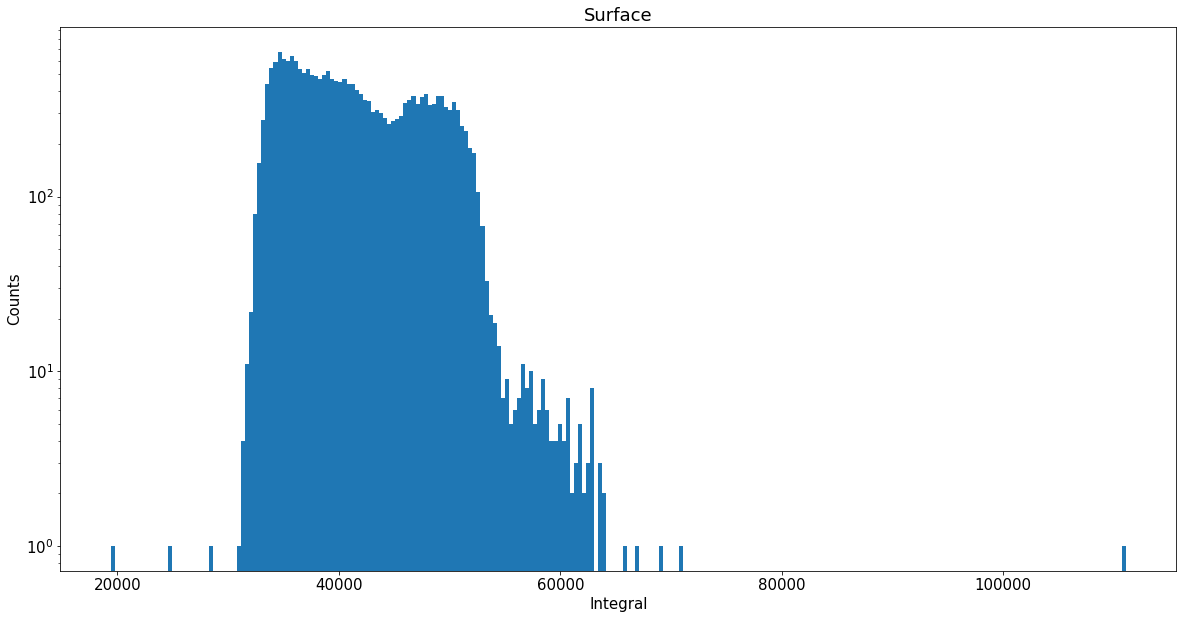

In [136]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

ble = plt.hist(y, bins=250)
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)
#plt.xlim(1000,140000)
plt.xlabel('Integral')
plt.ylabel('Counts')
plt.title('Surface')

Text(0.5,1,'Amplitude')

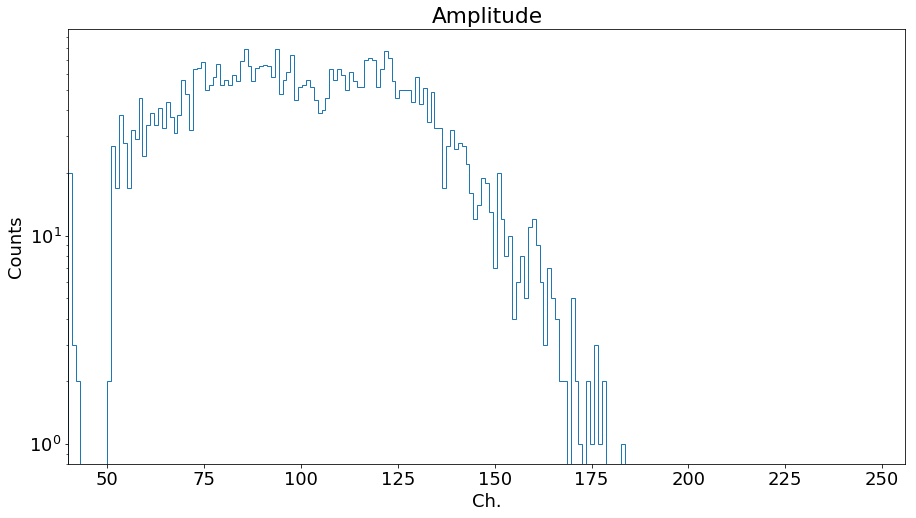

In [243]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))

ble = plt.hist(x, bins=256-40-1, range=(40,256), histtype='step' )
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)
plt.xlim(40,256)
plt.xlabel('Ch.')
plt.ylabel('Counts')
plt.title('Amplitude')

## Cut Plot

./data/Na/data04_1559143613-CHAN1.h5 XINC: 1e-09  YINC: 0.0015625  FRAMES: 10090  YORIGIN: -119.0
./data/Co/data02_1559142413-CHAN1.h5 XINC: 1e-09  YINC: 0.0015625  FRAMES: 3757  YORIGIN: -119.0
./data/Co/data01_1559141460-CHAN1.h5 XINC: 1e-09  YINC: 0.0015625  FRAMES: 4844  YORIGIN: -119.0


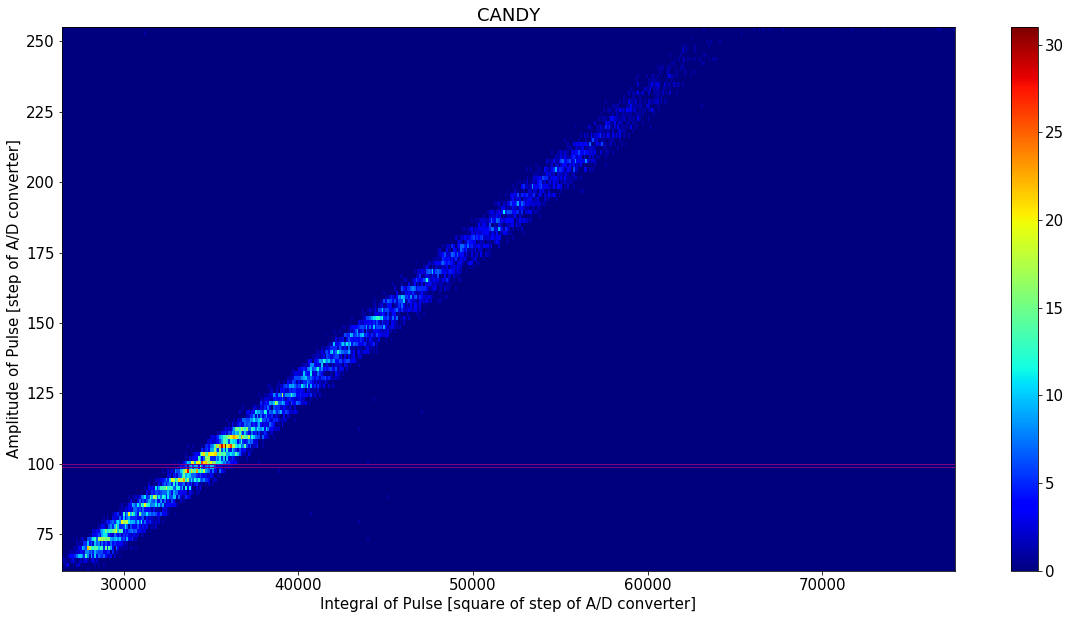

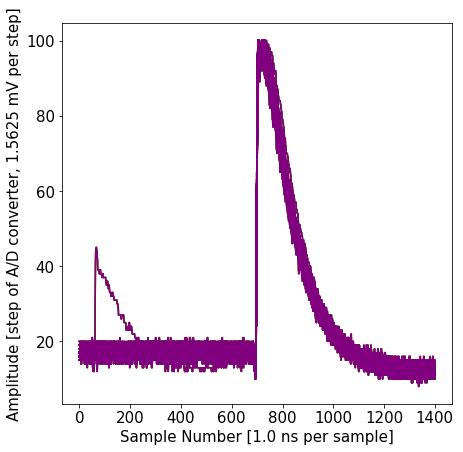

In [79]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]

                    if (maximum <= maxmax) and (maximum >= minmin):
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')

#ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,128),  cmap=plt.cm.jet)
#plt.xlim(60000,125000)
#plt.ylim(50,225)
plt.title('CANDY')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 100
maxmax2 = 100
maxmax3 = 100
maxmax4 = 46
maxmax5 = 35
width = 1

minmin1 = maxmax1-width
plt.plot([0,150000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
plt.plot([0,150000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
plt.plot([0,150000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
plt.plot([0,150000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,150000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,150000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
plt.plot([0,150000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
plt.plot([0,150000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
plt.plot([0,150000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
plt.plot([0,150000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
Cut(maxmax4,minmin4,'orange')
Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

In [31]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'red'
                        if (suma>73000) and (suma<82000):
                            colour = 'green'
                        if (suma>82000) and (suma<100000):
                            colour = 'purple'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('CANDY x CERF')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 190
maxmax2 = 167
maxmax3 = 123
maxmax4 = 105
maxmax5 = 60
width = 4

minmin1 = maxmax1-width
#plt.plot([0,175000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
#plt.plot([0,175000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x7f9fa8f44848> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

## Vertical Cut

In [32]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'purple'
                        if (suma>73000) and (suma<82000):
                            print suma, "."
                            colour = 'red'
                        if (suma>82000) and (suma<100000):
                            print suma
                            colour = 'green'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

def VCut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (suma<=maxmax) and (suma>=minmin):
                        #print maximum
                        colour = 'green'
                        if (maximum>70):
                            colour = 'red'
                            
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('Protons X Photons')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 81000
maxmax2 = 167
maxmax3 = 80
maxmax4 = 105
maxmax5 = 60
width = 1

minmin1 = maxmax1-1000
plt.plot([maxmax1,maxmax1],[0,250],c='r',lw=1,zorder=99)
plt.plot([minmin1,minmin1],[0,250],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.figure(3,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
VCut(maxmax1,minmin1,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x7f9fa8f44848> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

## Limited maximum histogram

./data/data40_1538561816-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data22_1538560556-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data15_1538559989-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data09_1538559561-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data14_1538559914-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data10_1538559633-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data23_1538560624-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data18_1538560275-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data13_1538559846-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data37_1538561604-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data32_1538561255-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data11_1538559

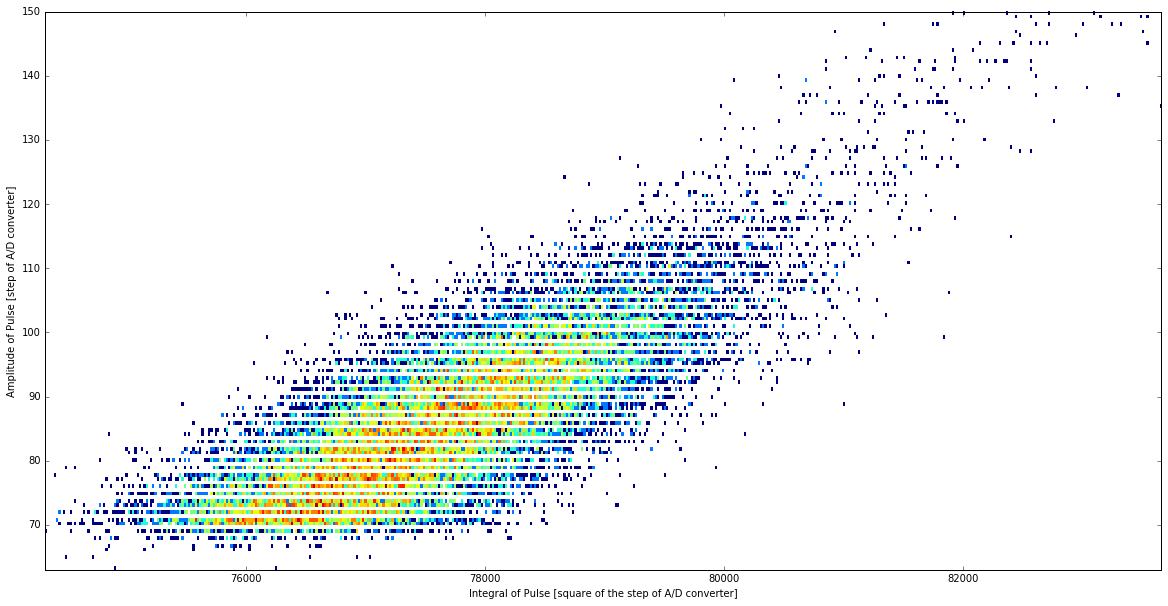

In [33]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 151):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,150), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


## Histogram for oscilloscope B

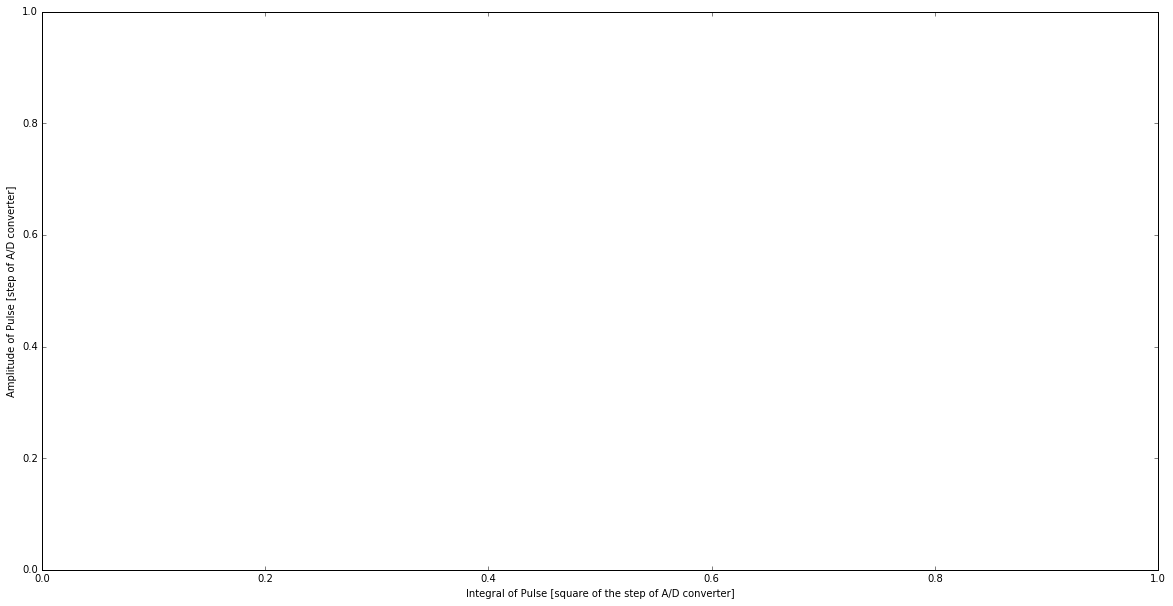

In [34]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./dataB/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./dataB/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()
